# Summarizing metrics from single vertical lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [15]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['', '_manual'])

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

# verticals

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='int_Ca', ylabel='horiz_totlenN'>)

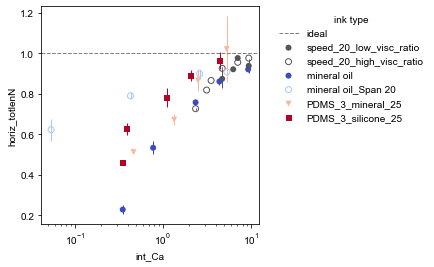

In [22]:
mp.sweepTypeSS(ss[(ss.sigma>0)&(ss.horiz_segments_manual==3)], 'int_Ca', 'horiz_totlenN',  logx=True,yideal=1,  dx=dx)

(<Figure size 432x288 with 0 Axes>,
 <AxesSubplot:xlabel='int_Ca', ylabel='horiz_totlenN'>)

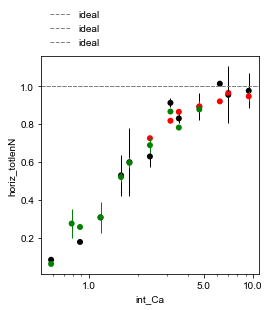

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
fig,ax = plt.subplots(1,1)
dx = 0.05
ss1 = ss.copy()
mp.simplifyType(ss1)
ss1 = ss1[ss1.sweepType=='speed_20']
mp.scatterSS(ss1, 'int_Ca', 'vert_hN', '', logx=True, ax=ax, yideal=1, dx=dx)
mp.scatterSS(ss1[(ss1.horiz_segments_manual==3)], 'int_Ca', 'horiz_totlenN', '', logx=True, ax=ax, yideal=1, color='red', dx=dx)
mp.scatterSS(ss1[(ss1.horiz_segments_manual>3)], 'int_Ca', 'horiz_totlenN', '', logx=True, ax=ax, yideal=1, color='green', dx=dx)

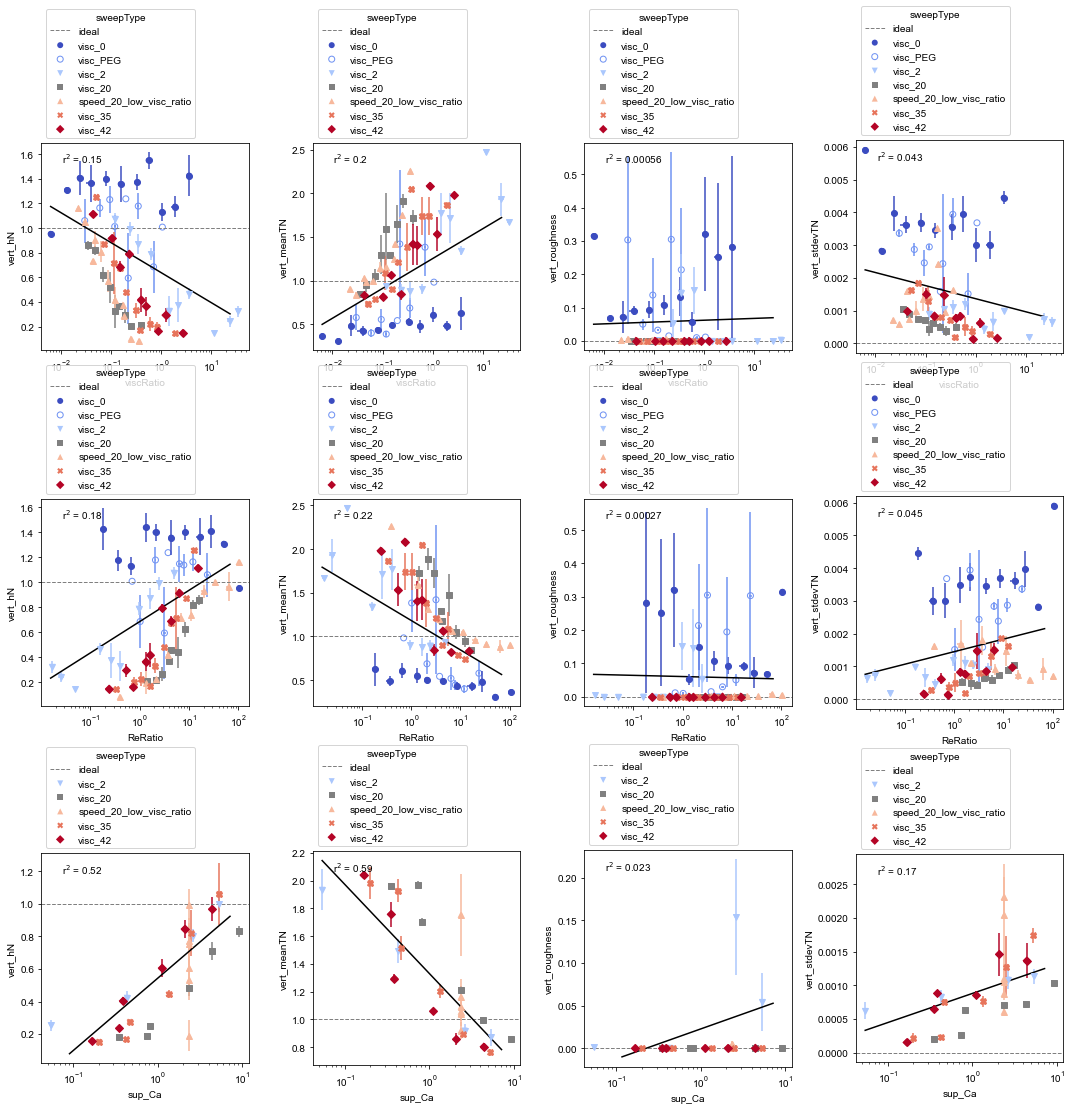

In [28]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(3,4,figsize=(15, 15))
for j,l in enumerate(['vert_hN', 'vert_meanTN', 'vert_roughness', 'vert_stdevTN']):
    for i,s in enumerate(['viscRatio', 'ReRatio', 'sup_Ca']):
        mp.scatterSS(ss1, s, l, 'sweepType', logx=True, yideal=[1, 1, 0, 0][j], ax=axs[i][j], fig=fig, plotReg=True)
fig.tight_layout()

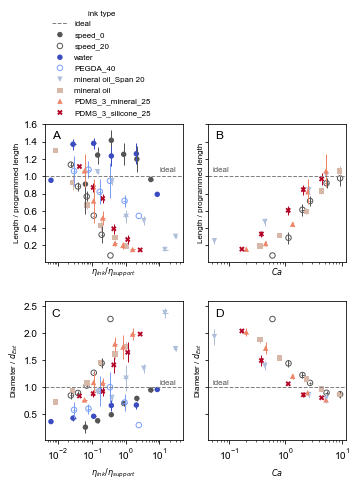

In [18]:
ss1 = ss.copy()
ss1 = ss1.sort_values(by='sigma')
mp.simplifyType(ss1)
fs = 8
ms = 30
fig,axs = plt.subplots(2, 2,figsize=(5, 7), sharey='row', sharex='col')
for j,yvar in enumerate(['vert_hN', 'vert_meanTN']):
    for i,xvar in enumerate(['viscRatio', 'int_Ca']):
        kwargs = {'fontsize':fs, 'markersize':ms, 'fig':fig, 'logx':True, 'logy':False, 'ax':axs[j][i], 'legend':((i==0)&(j==0)), 'dx':0.2}
        mp.sweepTypeSS(ss1, xvar, yvar, yideal=1, **kwargs)
    axs[j][0].set_xlabel('${\eta}_{ink}/{\eta}_{support}$', fontsize=fs)
    axs[j][1].set_xlabel('$Ca$', fontsize=fs)
for i in [0,1]:
    axs[0][i].set_ylabel('Length / programmed length', fontsize=fs)
    axs[1][i].set_ylabel('Diameter / $d_{Est}$', fontsize=fs)
    axs[i][0].text(10**1, 1.05, 'ideal', color='#555555', fontsize=fs)
    axs[i][1].text(0.5*10**-1, 1.05, 'ideal', color='#555555', fontsize=fs)


mp.subFigureLabels(axs)
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'vert_metrics.svg'), bbox_inches='tight', dpi=300)

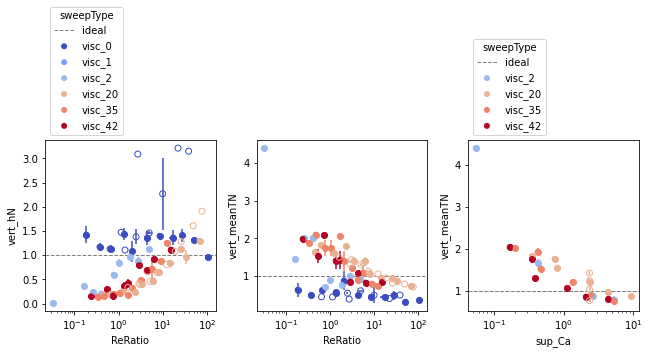

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sup_rPRN'] = 2*ss0['sup_rPR']/ss1['dEst']
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sigma']=1
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'ReRatio']=0
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sup_rPRN']=0
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
# ss0 = ss0[ss0.ink_type!="PEGDA_40"]
(ss0[ss0.sigma==0]).sup_Ca = [100000 for i in range(len(ss0[ss0.sigma==0]))]
ssspeed0 = ss0[ss0.sweepType=='speed_0']
ssspeed20 = ss0[ss0.sweepType=='speed_20']
cmap = cm.get_cmap('coolwarm') 
ssvisc = ss0[ss0.sweepType.str.contains('visc')]
fig,axs = plt.subplots(1,3,figsize=(9,9))
color20 = mp.adjust_lightness(cmap(3/5),0.9)
mp.scatterSS(ssvisc, 'ReRatio', 'vert_hN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'vert_hN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0], units=u, legend=False, marker=1, color=cmap(0))
mp.scatterSS(ssspeed20, 'ReRatio', 'vert_hN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc, 'ReRatio', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1], units=u, legend=False, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[1], units=u, legend=False, marker=1, color=cmap(0))
mp.scatterSS(ssspeed20, 'ReRatio', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[1], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc, 'sup_Ca', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed20, 'sup_Ca', 'vert_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=False, marker=1, color=color20)
# mp.scatterSS(ssvisc,'sup_rPRN', 'vert_meanTN',  'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][1], units=u, legend=True, marker='o')
# mp.scatterSS(ssspeed20,'sup_rPRN', 'vert_meanTN',  'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1][1], units=u, legend=True, marker=1, color=color20)
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'vert_metrics.svg'), bbox_inches='tight', dpi=300)

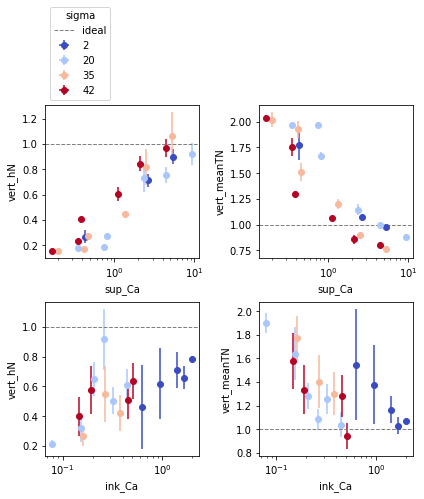

In [101]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

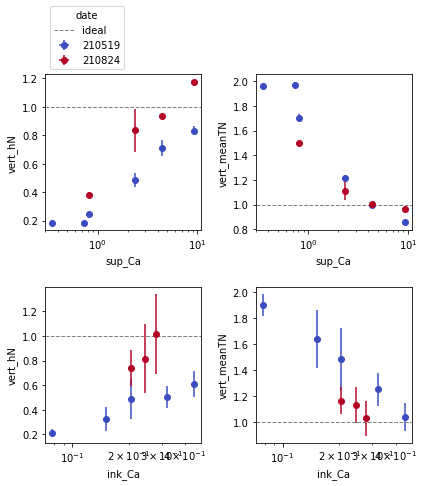

In [102]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma==20]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6,7))
for j,s2 in enumerate(['sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['vert_hN', 'vert_meanTN']):
        mp.scatterSS(ss1, s2, s, 'date', logx=True, yideal=1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.1)
fig.tight_layout()

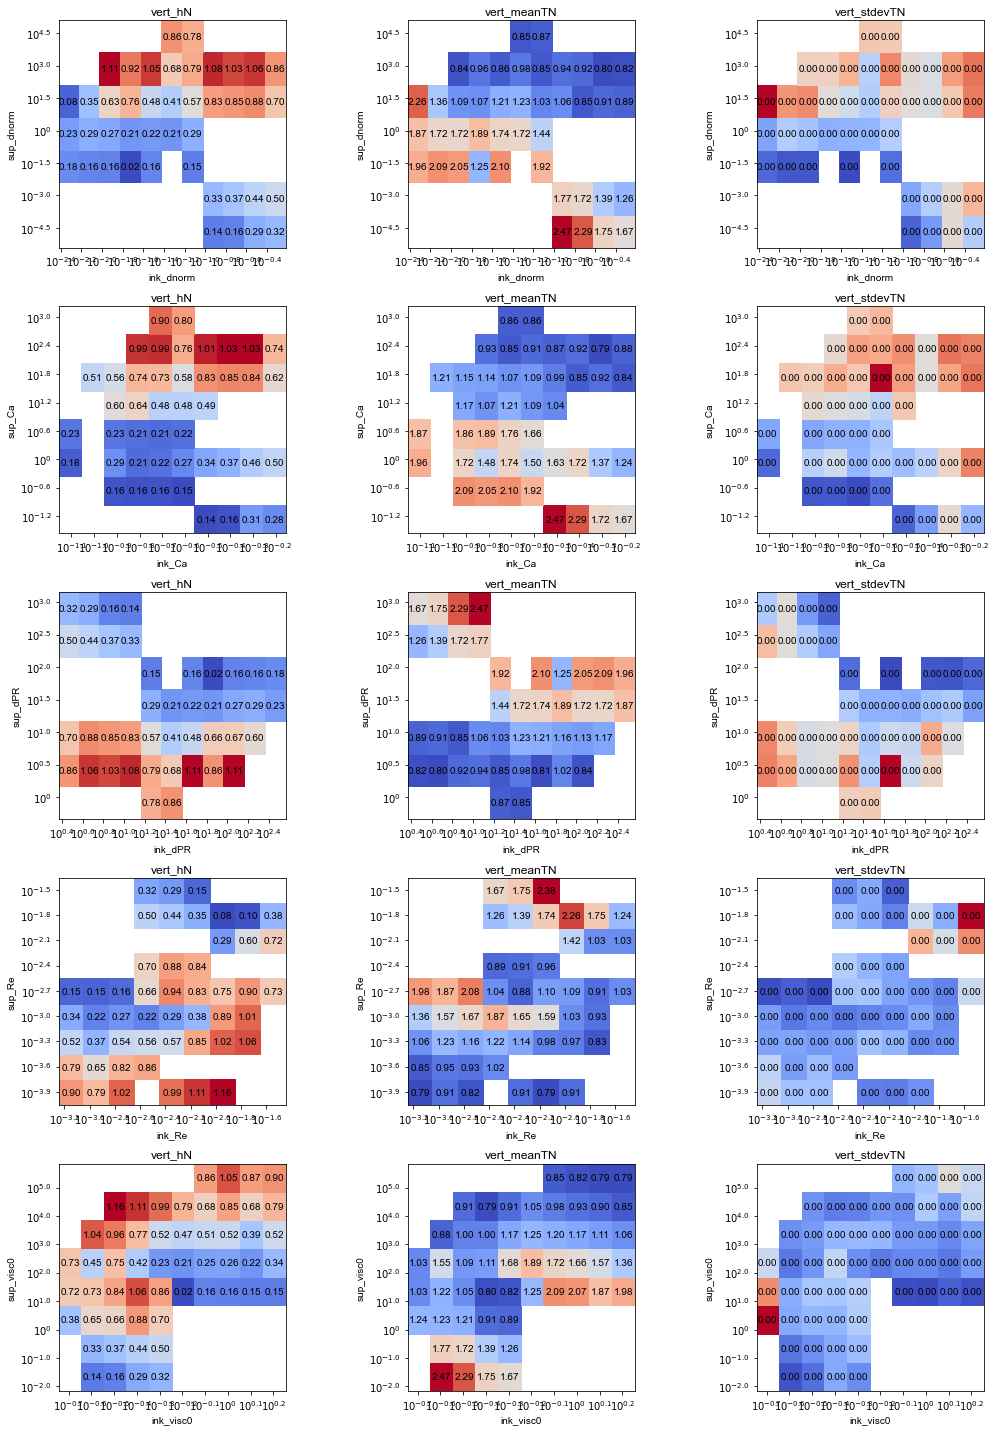

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [45]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(5,3, figsize=(15,20))
for i, s in enumerate(['dnorm', 'Ca', 'dPR', 'Re', 'visc0']):
    for j, color in enumerate(['vert_hN', 'vert_meanTN', 'vert_stdevTN']):
        mp.colorMeshSS(ss1, 'ink_'+s, 'sup_'+s, color, logx=True, logy=True, ax=axs[i][j], legend=False)
fig.tight_layout()